In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.optimizers import Adam

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
train_dir = '/content/gdrive/MyDrive/final_pc_dataset/train'
validation_dir = '/content/gdrive/MyDrive/final_pc_dataset/val'
test_dir = '/content/gdrive/MyDrive/final_pc_dataset/test'
BATCH_SIZE = 32
IMG_SIZE = [256, 256]

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 4000 files belonging to 2 classes.
Found 1100 files belonging to 2 classes.


In [ ]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 400 files belonging to 2 classes.


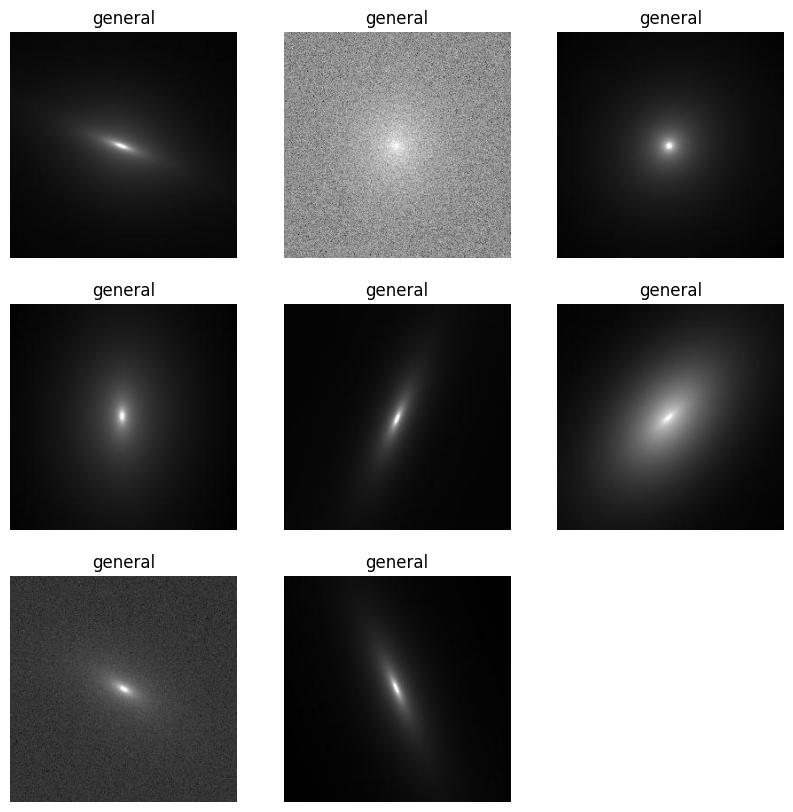

In [ ]:
class_names = train_dataset.class_names


plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])


In [ ]:
# preprocess_input = tf.keras.applications.inception_resnet_v2.preprocess_input

In [ ]:
model = tf.keras.Sequential()
# model.add(tf.keras.layers.InputLayer(shape = (256, 256, 3)))
# model.add(tf.keras.layers.Conv2D(32, (3, 3), strides=2, activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.Conv2D(64, (3, 3), strides=2, activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.Conv2D(128, (3, 3), strides=2, activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(512, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

InceptionResNet_V2 = tf.keras.applications.InceptionResNetV2(include_top = False,
                     weights = None,
                     input_shape = (256, 256, 3),
                     pooling = 'max',
                     classes = 2)

InceptionResNet_V2.trainable = True

model.add(InceptionResNet_V2)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 1536)              54336736  
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 1536)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               786944    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 55124193 (210.28 MB)
Trainable params: 55063649 (210.05 MB)
Non-trainable params: 60544 (236.50 KB)
_________________________________________________________________


In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 8
)

Epoch 1/8
125/125 [==============================] - 121s 335ms/step - loss: 0.1037 - accuracy: 0.9700 - val_loss: 0.7857 - val_accuracy: 0.6364
Epoch 2/8
125/125 [==============================] - 39s 308ms/step - loss: 0.0067 - accuracy: 0.9970 - val_loss: 0.8834 - val_accuracy: 0.6445
Epoch 3/8
125/125 [==============================] - 39s 306ms/step - loss: 3.9670e-04 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 0.9991
Epoch 4/8
125/125 [==============================] - 39s 309ms/step - loss: 5.6878e-04 - accuracy: 1.0000 - val_loss: 2.7028e-04 - val_accuracy: 1.0000
Epoch 5/8
125/125 [==============================] - 39s 307ms/step - loss: 2.2598e-04 - accuracy: 1.0000 - val_loss: 3.7205e-05 - val_accuracy: 1.0000
Epoch 6/8
125/125 [==============================] - 39s 307ms/step - loss: 8.0803e-04 - accuracy: 0.9995 - val_loss: 1.9813e-04 - val_accuracy: 1.0000
Epoch 7/8
125/125 [==============================] - 39s 308ms/step - loss: 0.0245 - accuracy: 0.9937 - val

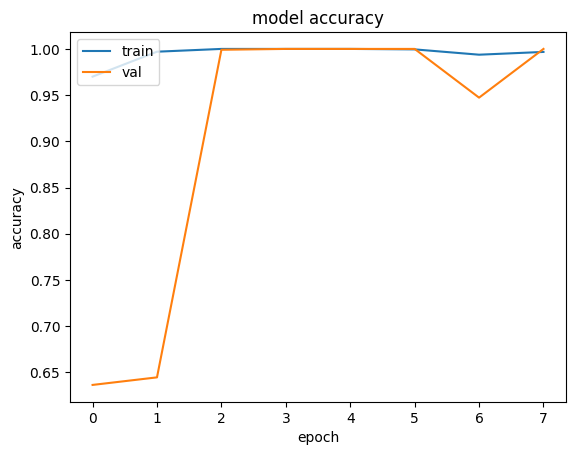

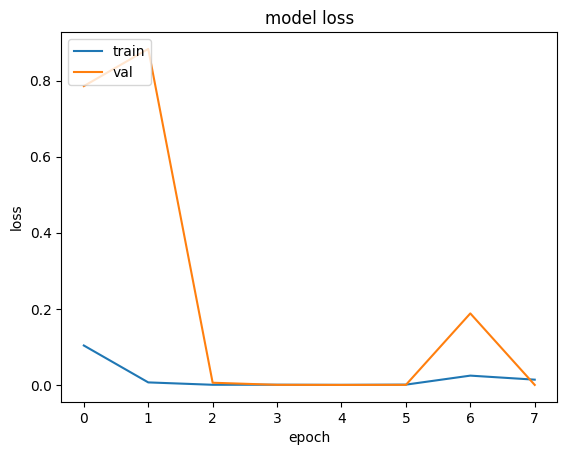

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/gdrive/MyDrive/final_polar_class/model_pre.keras')